In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams
##

import os
import sys

sys.path.append('../')
import visuals
rcParams['text.latex.preamble']=r"\usepackage{amsmath} \usepackage{xfrac} "
# rcParams['text.latex.preamble'] = r'\boldmath'

print(sys.path)

_datadir = "./reversible/"
_output = "../images/"

['/Users/kumiori3/Documents/WIP/Nature/paper_UMUT/data', '/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python311.zip', '/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11', '/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/lib-dynload', '', '/Users/kumiori3/Library/Python/3.11/lib/python/site-packages', '/opt/homebrew/lib/python3.11/site-packages', '../']


## Energy plot

In [3]:
def load_data(file_path):
    try:
        return np.loadtxt(file_path)
    except IOError as e:
        print(f"Error loading file {file_path}: {e}")
        return None

def process_and_plot_data(data, ax0):
    size_list = np.size(data[:, 0])
    stability_current = data[0, 2]
    load_1 = np.array([data[0, 0]])
    energy_1 = np.array([data[0, 1]])
    
    for ind_e in range(size_list):
        load_t = data[ind_e, 0]
        if -stability_current == data[ind_e, 2] or ind_e == (size_list - 1):
            load_mean = (data[ind_e - 1, 0] + data[ind_e, 0]) / 2
            e_mean = (data[ind_e - 1, 1] + data[ind_e, 1]) / 2
            # print('np.array([%.10f, %.10f])' % (load_mean, e_mean))
            if np.size(load_1) > 1:
                load_1[-1] = load_mean
                energy_1[-1] = e_mean
            if stability_current == 1:
                ax0.plot(load_1, energy_1, c='C0', linewidth=3)
            elif stability_current == -1:
                ax0.plot(load_1, energy_1, c='C1', linewidth=3)
            stability_current = data[ind_e, 2]
            load_1 = np.array(load_mean)
            energy_1 = np.array(e_mean)
            # ax0.axvline(load_1)
        else:
            load_1 = np.append(load_1, data[ind_e, 0])
            energy_1 = np.append(energy_1, data[ind_e, 1])

def find_energy_jumps(energy_series, threshold = .001):
    """
    Find indices where the energy series has jumps greater than the given threshold.

    Parameters:
    energy_series (np.array): A NumPy array representing the energy time series.
    threshold (float): The threshold to detect jumps.

    Returns:
    list: Indices where the jumps exceed the threshold.
    """
    # Compute the differences between consecutive elements
    diffs = np.diff(energy_series)
    
    # Find indices where the absolute value of the difference exceeds the threshold
    jump_indices = np.where(np.abs(diffs) > threshold)[0]
    
    # Add 1 to the indices because np.diff reduces the array length by 1
    jump_indices += 1
    
    return jump_indices.tolist()

def plot_arrow(ax0, point_xy, la_temp):
    ax0.scatter(point_xy[0], point_xy[1], s=120, facecolors='none', edgecolors='k', zorder=3)
    dx = 0.0
    dy = -la_temp
    w_a = 0.7*0.02
    h_w = 0.7*0.08
    h_l = 0.7*0.0008
    if la_temp>0:
        ax0.arrow(point_xy[0], point_xy[1]-0.00023, dx, dy, facecolor='k', 
                head_width = h_w, head_length = h_l, width = w_a, 
                edgecolor='none', lw=circle_edge_size, zorder=3)
        # plt.arrow(point_xy[0], point_xy[1]-0.0001, 0.0, -0.0003, facecolor='w', 
        #         head_width = 0, head_length = 0, width = w_a-0.01, 
        #         edgecolor='none', lw=circle_edge_size, zorder=3)
        ax0.scatter(point_xy[0], point_xy[1]-la_temp-h_l-0.0003, s=120, facecolors='none', edgecolors='k', zorder=3)

from matplotlib import colors
fc = colors.to_rgba('white')

def annotate_min(data, ax, label, offset = (0, 0)):
    # xy = line.get_xydata()
    min_index = np.argmin(data[:, 1]), 
    min_point = [data[min_index, 0][0], np.min(data[:, 1])]  # Get the (x, y) at the min_index
    print('min_point', min_point)
    ax.annotate(f'{label}', xy=min_point,
                xytext=(min_point[0] + offset[0], min_point[1] + offset[1]),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                bbox=dict(
                    # boxstyle='rarrow,pad=0.1', 
                    facecolor=fc[:-1]+(0.7,),
                    edgecolor=fc[:-1]+(0.7,),
                          ))


min_point [1.45, -0.0]
min_point [1.8045062816, -0.0065379848]
min_point [2.0999821332, -0.013003791]
min_point [2.424125192, -0.0098695313]
min_point [2.7331812662, -0.0039192637]
min_point [3.0454541438, -0.000215905]


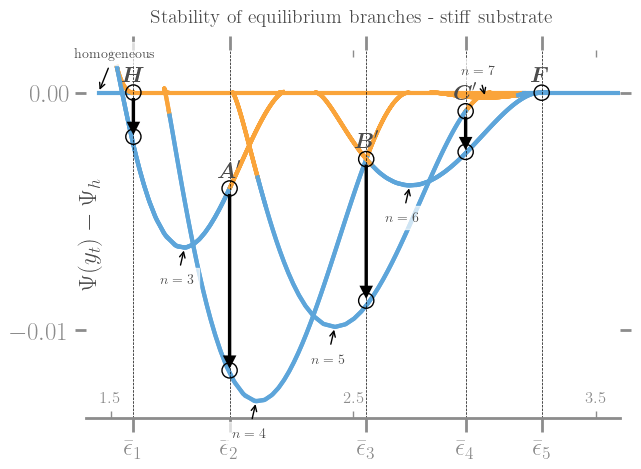

In [288]:

# fig = plt.figure()
# gs = GridSpec(5,3, width_ratios=[6, 1, 1]) # 2 rows, 3 columns
# ax0 = fig.add_subplot(gs[:,0]) # Energy 

fig, ax0 = plt.subplots()

labels = ["homogeneous", "$n=3$", "$n=4$", "$n=5$", "$n=6$", "$n=7$"]

list_auto = np.array([1, 2, 3, 4, 10, 8])
for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    file_path = os.path.join(_datadir, f'model_1_{ind_p}.txt')
    data = load_data(file_path)
    if data is not None:
        process_and_plot_data(data, ax0)
        if ind_pt == 0:
            annotate_min(data, ax0, labels[ind_pt], offset=(-.1, 0.0015))
        elif ind_pt == 5:
            annotate_min(data, ax0, labels[ind_pt], offset=(-.1, 0.001))
        else: annotate_min(data, ax0, labels[ind_pt], offset=(-.1, -.0015))
#-------------------------------------------
## plotting circles
circle_edge_size = 2
## H
H_point = np.array([1.5937969925, 0.0000000000])
A_prime_point = np.array([1.9904599557, -0.0040393529])
B_prime_point = np.array([2.5537152245, -0.0028032125])
C_prime_point = np.array([2.9635757174, -0.0007895701])
F_point = np.array([3.2771690558, -7.9311e-06])

length_arrow = 0.001
plot_arrow(ax0, H_point, length_arrow)
## A_prime
length_arrow = 0.0068
plot_arrow(ax0, A_prime_point, length_arrow)
## B_prime
length_arrow = 0.0051
plot_arrow(ax0, B_prime_point, length_arrow)
## C_prime
length_arrow = 0.00085
plot_arrow(ax0, C_prime_point, length_arrow)
## F
length_arrow = -1
plot_arrow(ax0, F_point, length_arrow)

points_list = [H_point, A_prime_point, B_prime_point, C_prime_point, F_point]
ax0.set_xticks([point[0] for point in points_list],
               [*[f'$\\bar \\epsilon_{i}$' for i in range(1, len(points_list)+1)]])
ax0.tick_params(axis='x', which='major', direction='out', length=10, width=2)

ax0.set_xticks(np.arange(1.5, 4.5), np.arange(1.5,  4.5),  minor=True)
ax0.tick_params(axis='x', which='minor', direction='in', length=5, width=1, pad=-20, labelsize=12)

ax0.set_yticks([-.01, 0])
ax0.set_xlim(1.4, 3.6)
ax0.set_ylabel('$\Psi(y_t) - \Psi_h$')
ax0.yaxis.set_label_coords(.03, .5)

for point in points_list:
    ax0.axvline(point[0], color='k', linestyle='--', linewidth=0.5)
    
for point, label in zip(points_list, ['$\\boldsymbol{H}$', '$\\boldsymbol{A}\'$', '$\\boldsymbol{B}\'$', '$\\boldsymbol{C}\'$', '$\\boldsymbol{F}$']):
    ax0.text(point[0]-.05, point[1]+0.0005, label, fontsize=16)
ax0.set_title('Stability of equilibrium branches - stiff substrate', fontsize=14, pad=20)
plt.tight_layout()
visuals.setspines0()

# lines = ax0.get_lines()  # Retrieve all lines from the Axes
# for line in lines:
#     annotate_min(line, ax0)  # A

# plt.savefig(os.path.join(_output, 'model_stiff_energy.png'), dpi=300)
plt.savefig(os.path.join(_output, 'model_stiff_energy.pdf'), dpi=300)

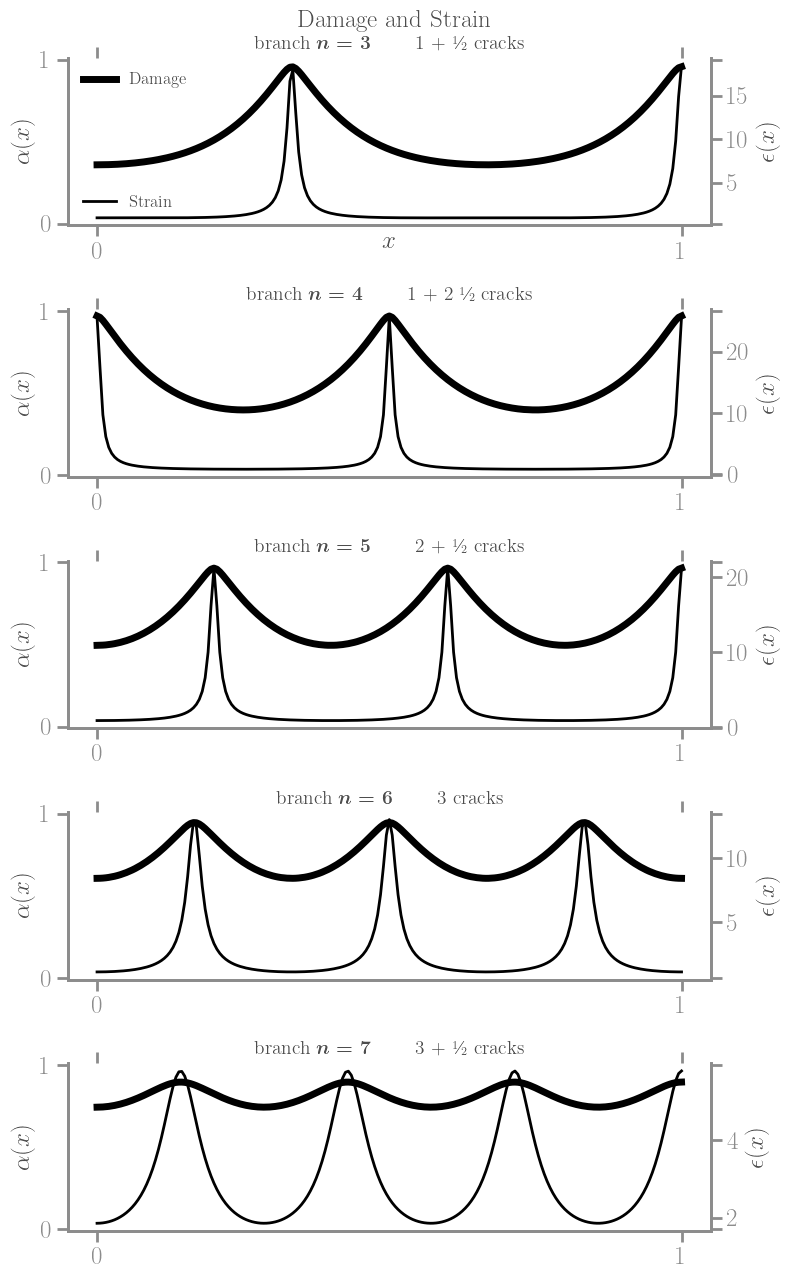

In [123]:
# gs = GridSpec(1, 2, width_ratios=[1, 1]) # 2 rows, 3 columns

list_auto = np.array([2, 3, 4, 10, 8]) 
fig, axes = plt.subplots(len(list_auto), 1, figsize=(8, 13))
labels = [3, 4, 5, 6, 7]
ext_labels = ["1 + \\sfrac{1}{2}", "1 + 2 \\sfrac{1}{2}", "2 + \\sfrac{1}{2}", 
              "3", "3 + \\sfrac{1}{2}"]

fig.suptitle('Damage and Strain', fontsize=18)

for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    # print(ind_p, ind_pt)
    # Plot_alpha(ind_p, axes[0], 12)
    # Plot_epsilon(ind_p, axes[1], 12)
    data_alpha = load_data(os.path.join(_datadir, f'model_1_min_energy_x_vs_alpha_{ind_p}.txt'))
    data_eps = load_data(os.path.join(_datadir, f'model_1_min_energy_x_vs_epsilon_{ind_p}.txt'))
    # np.loadtxt('model_1_min_energy_x_vs_alpha_%d.txt' %ind_p)
    axes[ind_pt].plot(data_alpha[:, 0], data_alpha[:, 1], c='k', lw=5, label=f'Damage')
    # axes[ind_pt, 1].plot(data_eps[:, 0], data_eps[:, 1], c='C1', lw=3)
    eps_ax = axes[ind_pt].twinx()
    eps_ax.plot(data_eps[:, 0], data_eps[:, 1], c='k', lw=2, label=f'Strain')
    axes[ind_pt].set_title(f'branch $\\boldsymbol{{n = {labels[ind_pt]}}}\\qquad$ {ext_labels[ind_pt]} cracks', fontsize=14)
    if ind_pt == 0:
        # axes[ind_pt].set_title('Damage and Strain', fontsize=14)
        eps_ax.legend(loc='lower left')
        axes[ind_pt].set_xlabel('$x$')
        axes[ind_pt].xaxis.set_label_coords(.5, -.03)

        
    axes[ind_pt].set_ylim([-0.01, 1.01])
    # axes[ind_pt, 1].set_ylim([-0.01, 1.01])
    axes[ind_pt].set_xticks([0, 1])
    axes[ind_pt].set_yticks([0, 1])
    axes[ind_pt].set_ylabel('$\\alpha(x)$')
    eps_ax.set_ylabel('$\\epsilon(x)$')
    # eps_ax.set_yticks([0, 1])

axes[0].legend()

visuals.setspines2()
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

plt.savefig(os.path.join(_output, 'model_stiff_fields.pdf'), dpi=300)



## Model: compliant substrate

min_point [1.5438507637, -0.0082123187]
min_point [1.8114602926, -0.0199061659]
min_point [2.1258974874, -0.0211675867]
min_point [2.432100016, -0.0144822292]
min_point [2.7566898102, -0.0062092226]
min_point [3.0552354942, -0.0008207687]


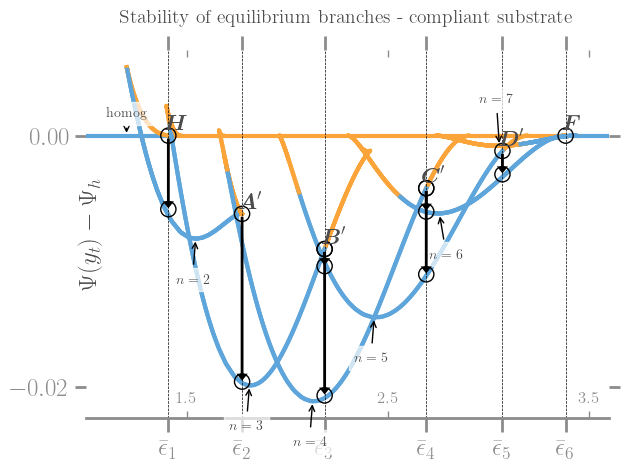

In [291]:

# fig = plt.figure()
# gs = GridSpec(5,3, width_ratios=[6, 1, 1]) # 2 rows, 3 columns
# ax0 = fig.add_subplot(gs[:,0]) # Energy 

fig, ax0 = plt.subplots()
labels = ["homogeneous", "$n=2$","$n=3$", "$n=4$", "$n=5$", "$n=6$", "$n=7$"]

list_auto = np.array([1, 2, 3, 4, 6, 7, 9]) 
for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    file_path = os.path.join(_datadir, f'model_2_{ind_p}.txt')
    data = load_data(file_path)
    if data is not None:
        process_and_plot_data(data, ax0)
        if ind_pt == 0:
            # annotate_min(data, ax0, labels[ind_pt], offset=(0., 0.1))
            # annotate_min(data, ax0, labels[ind_pt], offset=(2.6, 0.1))
            ax0.annotate(f'homog', xy=(1.2, 0.000),
                    xytext=(1.10, 0.0015),
                    arrowprops=dict(facecolor='black', arrowstyle='->'),
                    bbox=dict(
                        # boxstyle='rarrow,pad=0.1', 
                        facecolor=fc[:-1]+(0.7,),
                        edgecolor=fc[:-1]+(0.7,),
                            ))
        elif ind_pt == 5:
            annotate_min(data, ax0, labels[ind_pt], offset=(-.05, -0.0035))#-------------------------------------------
        elif ind_pt == 6:
            annotate_min(data, ax0, labels[ind_pt], offset=(-.1, 0.0035))#-#-------------------------------------------
        else: 
            annotate_min(data, ax0, labels[ind_pt], offset=(-.1, -0.0035))#-------------------------------------------
## plotting circles
circle_edge_size = 2
## H
H_point = np.array([1.42785571145-0.02, 0.0000000000])
A_prime_point = np.array([1.7747393522000001, -0.0062324497])
B_prime_point = np.array([2.1855120281, -0.0090345641])
C_prime_point = np.array([2.6912294867, -0.00418862405])
D_prime_point = np.array([3.0703009444, -0.0012200307])
F_point = np.array([3.3847598835, -4.785e-08])
length_arrow = 0.001

length_arrow = 0.005
plot_arrow(ax0, H_point, length_arrow)

length_arrow = 0.0125
plot_arrow(ax0, A_prime_point, length_arrow)

length_arrow = 0.0108
plot_arrow(ax0, B_prime_point, length_arrow)

length_arrow = 0.0005
plot_arrow(ax0, B_prime_point, length_arrow)

length_arrow = 0.001
plot_arrow(ax0, C_prime_point, length_arrow)

length_arrow = 0.006
plot_arrow(ax0, C_prime_point, length_arrow)

length_arrow = 0.001
plot_arrow(ax0, D_prime_point, length_arrow)

length_arrow = -1
plot_arrow(ax0, F_point, length_arrow)


points_list = [H_point, A_prime_point, B_prime_point, C_prime_point, D_prime_point, F_point]
    
# points_list = [H_point, A_prime_point, B_prime_point, C_prime_point, F_point]
ax0.set_xticks([point[0] for point in points_list],
               [*[f'$\\bar \\epsilon_{i}$' for i in range(1, len(points_list)+1)]])
ax0.tick_params(axis='x', which='major', direction='out', length=10, width=2)

ax0.set_xticks(np.arange(1.5, 4.5), np.arange(1.5,  4.5),  minor=True)
ax0.tick_params(axis='x', which='minor', direction='in', length=5, width=1, pad=-20, labelsize=12)

ax0.set_yticks([-.02, 0])
ax0.set_xlim(1., 3.6)

for point in points_list:
#     # ax0.scatter(point[0], point[1], s=120, facecolors='g', edgecolors='k', zorder=3)
    ax0.axvline(point[0], color='k', linestyle='--', linewidth=0.5)
    
for point, label in zip(points_list, ['$\\boldsymbol{H}$', '$\\boldsymbol{A}\'$', '$\\boldsymbol{B}\'$', '$\\boldsymbol{C}\'$', '$\\boldsymbol{D}\'$', '$\\boldsymbol{F}$']):
    ax0.text(point[0]-.02, point[1]+0.0005, label, fontsize=16)

ax0.set_title('Stability of equilibrium branches - compliant substrate', fontsize=14, pad=20)
ax0.set_ylabel('$\Psi(y_t) - \Psi_h$')
ax0.yaxis.set_label_coords(.03, .5)

visuals.setspines0()
plt.tight_layout()

# plt.savefig(os.path.join(_output, 'model_compliant_energy.png'), dpi=300)
plt.savefig(os.path.join(_output, 'model_compliant_energy.pdf'), dpi=300)


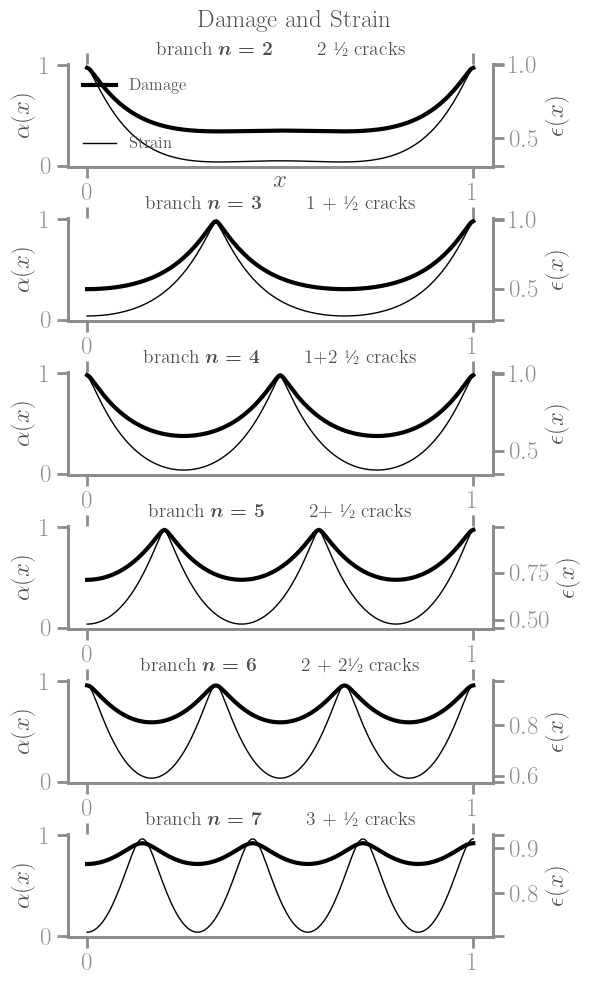

In [295]:
# gs = GridSpec(1, 2, width_ratios=[1, 1]) # 2 rows, 3 columns

list_auto = np.array([2, 3, 4, 6, 7, 9]) 
fig, axes = plt.subplots(len(list_auto), 1, figsize=(6, 10))
labels = [2, 3, 4, 5, 6, 7]
ext_labels = ["2 \\sfrac{1}{2}", "1 + \\sfrac{1}{2}", "1+2 \\sfrac{1}{2}", 
              "2+ \\sfrac{1}{2}", "2 + 2\\sfrac{1}{2}", "3 + \\sfrac{1}{2}"]

fig.suptitle('Damage and Strain', fontsize=18)

for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    # print(ind_p, ind_pt)
    # Plot_alpha(ind_p, axes[0], 12)
    # Plot_epsilon(ind_p, axes[1], 12)
    data_alpha = load_data(os.path.join(_datadir, f'model_2_min_energy_x_vs_alpha_{ind_p}.txt'))
    data_eps = load_data(os.path.join(_datadir, f'model_2_min_energy_x_vs_epsilon_{ind_p}.txt'))
    axes[ind_pt].plot(data_alpha[:, 0], data_alpha[:, 1], c='k', lw=3, label=f'Damage')
    axes[ind_pt].set_title(f'branch $\\boldsymbol{{n = {labels[ind_pt]}}}\\qquad$ {ext_labels[ind_pt]} cracks', fontsize=14)
    eps_ax = axes[ind_pt].twinx()
    eps_ax.plot(data_eps[:, 0], data_eps[:, 1], c='k', lw=1, label=f'Strain')
    
    if ind_pt == 0:
        eps_ax.legend(loc='lower left')
        axes[ind_pt].set_xlabel('$x$')
        axes[ind_pt].legend(loc='upper left')
        axes[ind_pt].xaxis.set_label_coords(.5, -.03)
  
        
    axes[ind_pt].set_ylim([-0.01, 1.01])
    # axes[ind_pt, 1].set_ylim([-0.01, 1.01])
    axes[ind_pt].set_xticks([0, 1])
    axes[ind_pt].set_yticks([0, 1])
    axes[ind_pt].set_ylabel('$\\alpha(x)$')
    eps_ax.set_ylabel('$\\epsilon(x)$')
    # eps_ax.set_yticks([0, 1])


visuals.setspines2()
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

# plt.savefig(os.path.join(_output, 'model_compliant_fields.png'), dpi=300)
plt.savefig(os.path.join(_output, 'model_compliant_fields.pdf'), dpi=300)



## Spectra

0

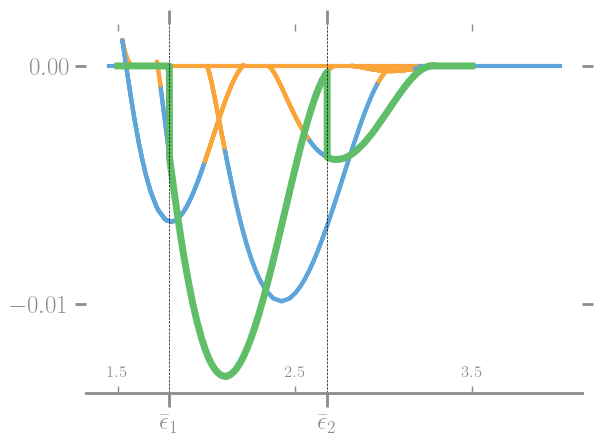

In [298]:
list_auto = np.array([1, 2, 3, 4, 10, 8]) 

fig, axes = plt.subplots(1, 1)


for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    
    data = load_data(os.path.join(_datadir, f'model_1_{ind_p}.txt'))
    size_list = np.size(data[:, 0])
    stability_current  = data[0, 2]
    load_1 = np.array([data[0, 0]])
    energy_1 = np.array([data[0, 1]])
    for ind_e in range(size_list):
        load_t = data[ind_e, 0]
        #e_0_list[ind_e] = load_t*load_t/(2.0 + load_t*load_t) + (rs/2.0)*load_t*load_t
        if -stability_current==data[ind_e, 2] or ind_e==(size_list - 1):
            load_mean = (data[ind_e - 1, 0] + data[ind_e, 0])/2
            e_mean = (data[ind_e - 1, 1] + data[ind_e, 1])/2
            if np.size(load_1)>1:
                load_1[-1] = load_mean
                energy_1[-1] = e_mean
            if stability_current==1:
                axes.plot(load_1, energy_1, c='C0', linewidth=3)
            elif stability_current==-1:
                axes.plot(load_1, energy_1, c='C1', linewidth=3)
            stability_current  = data[ind_e, 2]
            load_1 =  np.array(load_mean)
            energy_1 =  np.array(e_mean)
        else:
            load_1 = np.append(load_1, data[ind_e, 0])
            energy_1 = np.append(energy_1, data[ind_e, 1])







# data_load = np.loadtxt('list_672_load.txt')
file_path = os.path.join(_datadir, f'list_672_load.txt')
data_load = load_data(file_path)
num_points = np.size(data_load, 0)
energy_list = np.zeros(num_points)
for ind_pl in range(num_points):
    load = data_load[ind_pl, 0]
    e0 = load*load/(2.0 + load*load)
    energy_list[ind_pl] = data_load[ind_pl, 1] - e0
axes.plot(data_load[:, 0], energy_list, c='C2', linewidth=5)

jump_indices = find_energy_jumps(energy_list)
[axes.axvline(data_load[idx, 0], color='k', linestyle='--', linewidth=0.5) for idx in jump_indices]


axes.set_xticks([point for point in data_load[jump_indices, 0]],
               [*[f'$\\bar \\epsilon_{i}$' for i in range(1, len(data_load[jump_indices, 0])+1)]])
axes.tick_params(axis='x', which='major', direction='out', length=10, width=2)

axes.set_xticks(np.arange(1.5, 4.5), np.arange(1.5,  4.5),  minor=True)
axes.tick_params(axis='x', which='minor', direction='in', length=5, width=1, pad=-20, labelsize=12)
axes.set_yticks([-.01, 0])
# axes.set_xlim(1., 3.6)

visuals.setspines0()

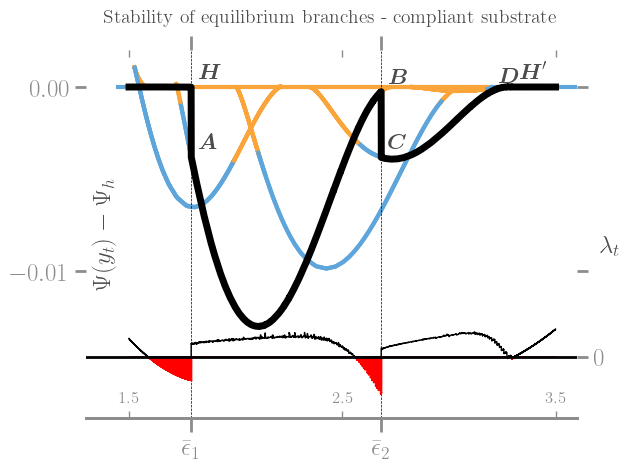

In [315]:
list_auto = np.array([1, 2, 3, 4, 10, 8]) 

fig, axes = plt.subplots(1, 1)


for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    
    data = load_data(os.path.join(_datadir, f'model_1_{ind_p}.txt'))
    size_list = np.size(data[:, 0])
    stability_current  = data[0, 2]
    load_1 = np.array([data[0, 0]])
    energy_1 = np.array([data[0, 1]])
    for ind_e in range(size_list):
        load_t = data[ind_e, 0]
        #e_0_list[ind_e] = load_t*load_t/(2.0 + load_t*load_t) + (rs/2.0)*load_t*load_t
        if -stability_current==data[ind_e, 2] or ind_e==(size_list - 1):
            load_mean = (data[ind_e - 1, 0] + data[ind_e, 0])/2
            e_mean = (data[ind_e - 1, 1] + data[ind_e, 1])/2
            if np.size(load_1)>1:
                load_1[-1] = load_mean
                energy_1[-1] = e_mean
            if stability_current==1:
                axes.plot(load_1, energy_1, c='C0', linewidth=3)
            elif stability_current==-1:
                axes.plot(load_1, energy_1, c='C1', linewidth=3)
            stability_current  = data[ind_e, 2]
            load_1 =  np.array(load_mean)
            energy_1 =  np.array(e_mean)
        else:
            load_1 = np.append(load_1, data[ind_e, 0])
            energy_1 = np.append(energy_1, data[ind_e, 1])







# data_load = np.loadtxt('list_672_load.txt')
file_path = os.path.join(_datadir, f'list_672_load.txt')
data_load = load_data(file_path)
num_points = np.size(data_load, 0)
energy_list = np.zeros(num_points)
for ind_pl in range(num_points):
    load = data_load[ind_pl, 0]
    e0 = load*load/(2.0 + load*load)
    energy_list[ind_pl] = data_load[ind_pl, 1] - e0
axes.plot(data_load[:, 0], energy_list, c='k', linewidth=5)

jump_indices = find_energy_jumps(energy_list)
[axes.axvline(data_load[idx, 0], color='k', linestyle='--', linewidth=0.5) for idx in jump_indices]


axes.set_xticks([point for point in data_load[jump_indices, 0]],
               [*[f'$\\bar \\epsilon_{i}$' for i in range(1, len(data_load[jump_indices, 0])+1)]])
axes.tick_params(axis='x', which='major', direction='out', length=10, width=2)

axes.set_xticks(np.arange(1.5, 4.5), np.arange(1.5,  4.5),  minor=True)
axes.tick_params(axis='x', which='minor', direction='in', length=5, width=1, pad=-20, labelsize=12)
axes.set_yticks([-.01, 0])
axes.set_ylim(-.018,.002)
axes.set_xlim(1.3,3.6)
index_list = [1456, 1457, 5911, 5912, 8500, 9000]

labels = ['$\\boldsymbol{H}$', '$\\boldsymbol{A}$', '$\\boldsymbol{B}$', '$\\boldsymbol{C}$', '$\\boldsymbol{D}$', '$\\boldsymbol{H}\'$']
for index, label in zip(index_list, labels):
    annotate_point = (data_load[index, 0], energy_list[index])
    # print('annotate_point', annotate_point)
    axes.text(annotate_point[0]+.03, annotate_point[1]+0.0005, label, fontsize=16)
    
#     axes.annotate(f'{label}', xy=min_point,
#                 xytext=(min_point[0] + offset[0], min_point[1] + offset[1]),
#                 arrowprops=dict(facecolor='black', arrowstyle='->'),
#                 bbox=dict(
#                     # boxstyle='rarrow,pad=0.1', 
#                     facecolor=fc[:-1]+(0.7,),
#                     edgecolor=fc[:-1]+(0.7,),
#                           ))

axes.set_ylabel('$\Psi(y_t) - \Psi_h$')
axes.yaxis.set_label_coords(.06, .5)

as_spectrum = axes.twinx()

file_path = os.path.join(_datadir, f'load_vs_eigenvalue0_model_1.txt')
data_eig = load_data(file_path)

as_spectrum.plot(data_eig[:, 0], np.maximum(data_eig[:, 1], 0), c='k', lw=1)
as_spectrum.fill_between(data_eig[:, 0], np.minimum(data_eig[:, 1], 0), color='r')
as_spectrum.axhline(0, c='k', linestyle='-')
as_spectrum.set_yticks([0])
as_spectrum.set_ylim([-0.001, .005])
as_spectrum.set_ylabel('$\lambda_t$', rotation="horizontal")

# as_spectrum.yaxis.set_label_coords(.95, 0.25)

as_spectrum.set_title('Stability of equilibrium branches - compliant substrate', fontsize=14, pad=20)

# visuals.setspines2()
visuals.setspines0()
plt.tight_layout()

# plt.savefig(os.path.join(_output, 'model_stiff_energy_kick.png'), dpi=300)
plt.savefig(os.path.join(_output, 'model_stiff_energy_kick.pdf'), dpi=300)


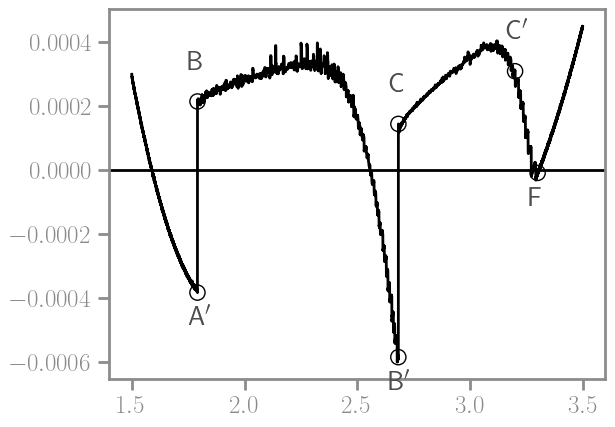

In [428]:
list_auto = np.array([1, 2, 3, 4, 10, 8]) 

fig, axis = plt.subplots(1, 1)

file_path = os.path.join(_datadir, f'load_vs_eigenvalue0_model_1.txt')
data_eig = load_data(file_path)
axis.plot(data_eig[:, 0], data_eig[:, 1], c='k')
axis.axhline(0, c='k', linestyle='-')
index_list = [1456, 1457, 5911, 5912, 8500, 9000]
list_letter = ['A\'', 'B', 'B\'', 'C', 'C\'', 'F']
delta_x = [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04]
delta_y = [-0.0002, 0.0001, -0.0002, 0.0001, 0.0001, -0.0002]
delta_x = -0.04
delta_y = -0.0001
for ind_j in range(len(index_list)):
    ind = index_list[ind_j]
    axis.scatter(data_eig[ind, 0], data_eig[ind, 1], s=120, facecolors='none', edgecolors='k', zorder=3)
    axis.text(data_eig[ind, 0]+delta_x, data_eig[ind, 1]-np.sign(data_eig[ind, 1])*delta_y, f'$\mathsf {list_letter[ind_j]}$', fontsize=20)
plt.savefig(os.path.join(_output, 'model_stiff_spectrum.png'), dpi=300)


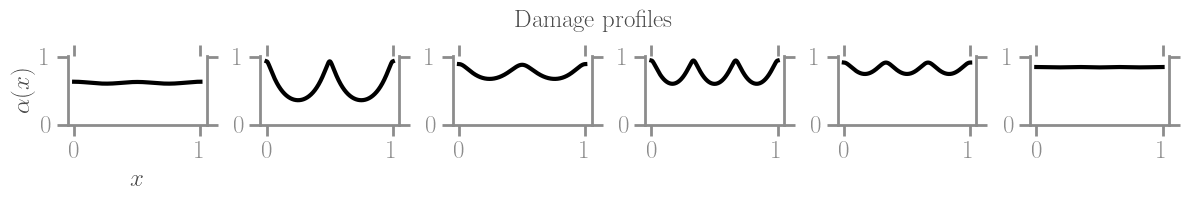

In [231]:
data_jumps = load_data(os.path.join(_datadir, 'jumps_alpha_model_1.txt'))
_cols = len(data_jumps[0, :])

# fig, axis = plt.subplots(1, _cols-1,  figsize=(12, 2))
fig, axis = plt.subplots(1, _cols-1,  figsize=(12, 2))

for ind_col in range(1,_cols):
    axis[ind_col-1].plot(data_jumps[:, 0], data_jumps[:, ind_col], c='k', lw=3)
    axis[ind_col-1].set_ylim([-0.01, 1.01])
    axis[ind_col-1].set_yticks([0, 1])
    axis[ind_col-1].set_xticks([0, 1])
    if ind_col == 1:
        axis[0].set_xlabel('$x$')
        axis[0].set_ylabel('$\\alpha(x)$')
# ax_A1.plot(data_jumps[:, 0], data_jumps[:, 1], c='C0')
# ax_A1.text(0.03, 0.01, 'A\'', fontsize=20)
# ##
# ax_A2.plot(data_jumps[:, 0], data_jumps[:, 2], c='C0')
# ax_A2.text(0.03, 0.01, 'B', fontsize=20)
# ##
# ax_A3.plot(data_jumps[:, 0], data_jumps[:, 3], c='C0')
# ax_A3.text(0.03, 0.01, 'B\'', fontsize=20)
# ##
# ax_A4.plot(data_jumps[:, 0], data_jumps[:, 4], c='C0')
# ax_A4.text(0.03, 0.01, 'C', fontsize=20)
# ##
# ax_A5.plot(data_jumps[:, 0], data_jumps[:, 5], c='C0')
# ax_A5.text(0.03, 0.01, 'C\'', fontsize=20)
# ##
# ax_A6.plot(data_jumps[:, 0], data_jumps[:, 6], c='C0')
# ax_A6.text(0.03, 0.01, 'F', fontsize=20)
visuals.setspines2()

plt.tight_layout()
fig.subplots_adjust(top=0.75)
fig.suptitle('Damage profiles', fontsize=18)
plt.savefig(os.path.join(_output, 'model_stiff_profiles.png'), dpi=300)



In [227]:
_cols

7

0
1
2
3
4
5


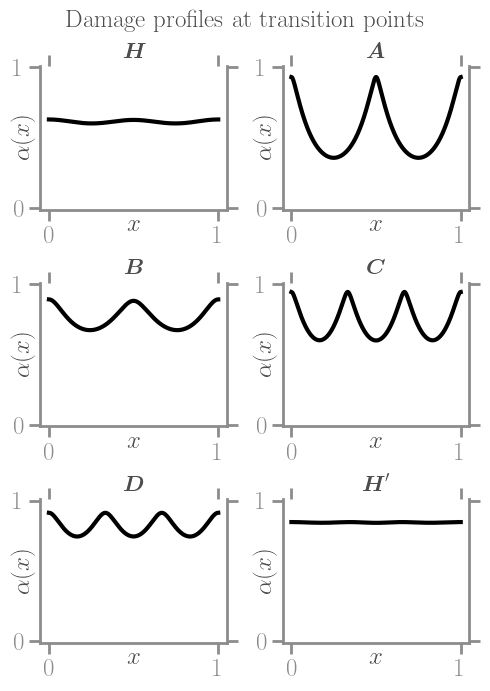

In [314]:
data_jumps = load_data(os.path.join(_datadir, 'jumps_alpha_model_1.txt'))
_cols = len(data_jumps[0, :])

# fig, axis = plt.subplots(1, _cols-1,  figsize=(12, 2))
fig, axes = plt.subplots(3, 2,  figsize=(5, 7))
labels = ['$\\boldsymbol{H}$', '$\\boldsymbol{A}$', '$\\boldsymbol{B}$', '$\\boldsymbol{C}$', '$\\boldsymbol{D}$', '$\\boldsymbol{H}\'$']

for ind_col, label in zip(range(6), labels):
    row = ind_col // 2  # Determine the row index based on column index
    col = ind_col % 2   # Determine the column index based on column index
    ax = axes[row, col]  # Select the subplot corresponding to current row and column
    print(ind_col)
    # print(row, ind_col)
    # print((row+1) * (ind_col+1))
    ax.plot(data_jumps[:, 0], data_jumps[:, ind_col+1], c='k', lw=3)
    ax.set_ylim([-0.01, 1.01])
    ax.set_yticks([0, 1])
    ax.set_xticks([0, 1])
    ax.set_xlabel('$x$')
    ax.set_ylabel('$\\alpha(x)$')
    ax.yaxis.set_label_coords(-.03, .5)
    ax.xaxis.set_label_coords(.5, -.03)
    ax.set_title(label, fontsize=16)
    # print(f'${label}$')

        # if ind_col == 1:
        #     axes[row][0].set_xlabel('$x$')
        #     axes[row][0].set_ylabel('$\\alpha(x)$')
# ax_A1.plot(data_jumps[:, 0], data_jumps[:, 1], c='C0')
# ax_A1.text(0.03, 0.01, 'A\'', fontsize=20)
# ##
# ax_A2.plot(data_jumps[:, 0], data_jumps[:, 2], c='C0')
# ax_A2.text(0.03, 0.01, 'B', fontsize=20)
# ##
# ax_A3.plot(data_jumps[:, 0], data_jumps[:, 3], c='C0')
# ax_A3.text(0.03, 0.01, 'B\'', fontsize=20)
# ##
# ax_A4.plot(data_jumps[:, 0], data_jumps[:, 4], c='C0')
# ax_A4.text(0.03, 0.01, 'C', fontsize=20)
# ##
# ax_A5.plot(data_jumps[:, 0], data_jumps[:, 5], c='C0')
# ax_A5.text(0.03, 0.01, 'C\'', fontsize=20)
# ##
# ax_A6.plot(data_jumps[:, 0], data_jumps[:, 6], c='C0')
# ax_A6.text(0.03, 0.01, 'F', fontsize=20)
visuals.setspines2()

plt.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Damage profiles at transition points', fontsize=18)
plt.savefig(os.path.join(_output, 'model_stiff_profiles.pdf'), dpi=300)



## Model: compliant substrate

(1.0, 3.6)

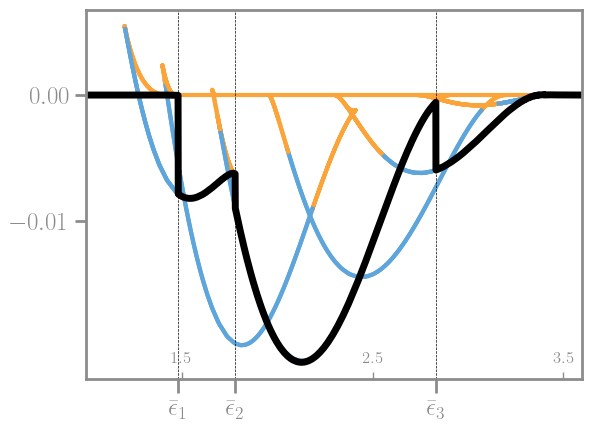

In [394]:
list_auto = np.array([1, 2, 3, 4, 6, 7, 9]) 

fig, axes = plt.subplots(1, 1)

for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    
    data = load_data(os.path.join(_datadir, f'model_2_{ind_p}.txt'))
    
    size_list = np.size(data[:, 0])
    
    stability_current  = data[0, 2]
    load_1 = np.array([data[0, 0]])
    energy_1 = np.array([data[0, 1]])

    for ind_e in range(size_list):
        load_t = data[ind_e, 0]
        if -stability_current==data[ind_e, 2] or ind_e==(size_list - 1):
            load_mean = (data[ind_e - 1, 0] + data[ind_e, 0])/2
            e_mean = (data[ind_e - 1, 1] + data[ind_e, 1])/2
            if np.size(load_1)>1:
                load_1[-1] = load_mean
                energy_1[-1] = e_mean
            if stability_current==1:
                axes.plot(load_1, energy_1, c='C0', linewidth=3)
            elif stability_current==-1:
                axes.plot(load_1, energy_1, c='C1', linewidth=3)
            stability_current  = data[ind_e, 2]
            load_1 =  np.array(load_mean)
            energy_1 =  np.array(e_mean)
        else:
            load_1 = np.append(load_1, data[ind_e, 0])
            energy_1 = np.append(energy_1, data[ind_e, 1])


# data_load = np.loadtxt('list_672_load.txt')
file_path = os.path.join(_datadir, f'list_678_load.txt')
data_load = load_data(file_path)
num_points = np.size(data_load, 0)
energy_list = np.zeros(num_points)
rs = 0.5
for ind_pl in range(num_points):
    load = data_load[ind_pl, 0]
    e0 = load*load/(2.0 + load*load) + (rs/2.0)*load*load
    energy_list[ind_pl] = data_load[ind_pl, 1] - e0
axes.plot(data_load[:, 0], energy_list, c='k', linewidth=5)
jump_indices = find_energy_jumps(energy_list)
[axes.axvline(data_load[idx, 0], color='k', linestyle='--', linewidth=0.5) for idx in jump_indices]


axes.set_xticks([point for point in data_load[jump_indices, 0]],
               [*[f'$\\bar \\epsilon_{i}$' for i in range(1, len(data_load[jump_indices, 0])+1)]])
axes.tick_params(axis='x', which='major', direction='out', length=10, width=2)

axes.set_xticks(np.arange(1.5, 4.5), np.arange(1.5,  4.5),  minor=True)
axes.tick_params(axis='x', which='minor', direction='in', length=5, width=1, pad=-20, labelsize=12)
axes.set_yticks([-.01, 0])
axes.set_xlim(1., 3.6)




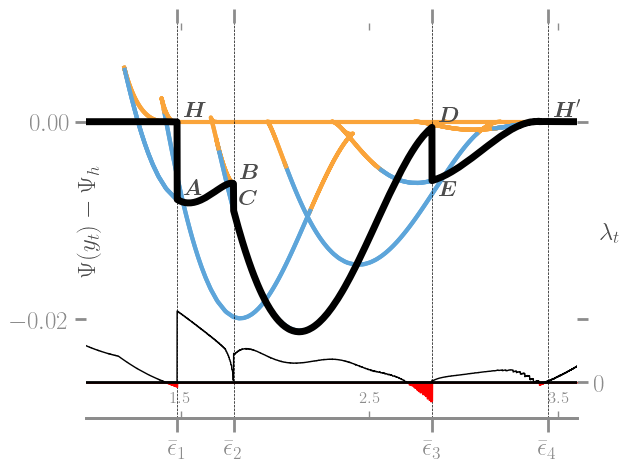

In [312]:
list_auto = np.array([1, 2, 3, 4, 6, 7, 9]) 

fig, axes = plt.subplots(1, 1)

for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    
    data = load_data(os.path.join(_datadir, f'model_2_{ind_p}.txt'))
    
    size_list = np.size(data[:, 0])
    
    stability_current  = data[0, 2]
    load_1 = np.array([data[0, 0]])
    energy_1 = np.array([data[0, 1]])

    for ind_e in range(size_list):
        load_t = data[ind_e, 0]
        if -stability_current==data[ind_e, 2] or ind_e==(size_list - 1):
            load_mean = (data[ind_e - 1, 0] + data[ind_e, 0])/2
            e_mean = (data[ind_e - 1, 1] + data[ind_e, 1])/2
            if np.size(load_1)>1:
                load_1[-1] = load_mean
                energy_1[-1] = e_mean
            if stability_current==1:
                axes.plot(load_1, energy_1, c='C0', linewidth=3)
            elif stability_current==-1:
                axes.plot(load_1, energy_1, c='C1', linewidth=3)
            stability_current  = data[ind_e, 2]
            load_1 =  np.array(load_mean)
            energy_1 =  np.array(e_mean)
        else:
            load_1 = np.append(load_1, data[ind_e, 0])
            energy_1 = np.append(energy_1, data[ind_e, 1])


# data_load = np.loadtxt('list_672_load.txt')
file_path = os.path.join(_datadir, f'list_678_load.txt')
data_load = load_data(file_path)
num_points = np.size(data_load, 0)
energy_list = np.zeros(num_points)
rs = 0.5
for ind_pl in range(num_points):
    load = data_load[ind_pl, 0]
    e0 = load*load/(2.0 + load*load) + (rs/2.0)*load*load
    energy_list[ind_pl] = data_load[ind_pl, 1] - e0
axes.plot(data_load[:, 0], energy_list, c='k', linewidth=5)
jump_indices = find_energy_jumps(energy_list) + [4700]
[axes.axvline(data_load[idx, 0], color='k', linestyle='--', linewidth=0.5) for idx in jump_indices]

index_list = [924, 925, 1499, 1500, 3522, 3523, 4700]

labels = ['$\\boldsymbol{H}$', '$\\boldsymbol{A}$', '$\\boldsymbol{B}$', '$\\boldsymbol{C}$', '$\\boldsymbol{D}$', '$\\boldsymbol{E}$', '$\\boldsymbol{H}\'$']
for index, label in zip(index_list, labels):
    annotate_point = (data_load[index, 0], energy_list[index])
    if label == '$\\boldsymbol{E}$':
        axes.text(annotate_point[0]+.03, annotate_point[1]-0.0015, label, fontsize=16)
    else:
    # print('annotate_point', annotate_point)
        axes.text(annotate_point[0]+.03, annotate_point[1]+0.0006, label, fontsize=16)
    

axes.set_xticks([point for point in data_load[jump_indices, 0]],
               [*[f'$\\bar \\epsilon_{i}$' for i in range(1, len(data_load[jump_indices, 0])+1)]])
axes.tick_params(axis='x', which='major', direction='out', length=10, width=2)

axes.set_xticks(np.arange(1.5, 4.5), np.arange(1.5,  4.5),  minor=True)
axes.tick_params(axis='x', which='minor', direction='in', length=5, width=1, pad=-20, labelsize=12)
axes.set_yticks([-.02, 0])
axes.set_xlim(1., 3.6)
axes.set_ylim(-.03, .01)

axes.set_ylabel('$\Psi(y_t) - \Psi_h$')
axes.yaxis.set_label_coords(.03, .5)

as_spectrum = axes.twinx()
file_path = os.path.join(_datadir, f'load_vs_eigenvalue0_model_2.txt')
data_eig = load_data(file_path)
as_spectrum.plot(data_eig[:, 0], np.maximum(data_eig[:, 1], 0), c='k', lw=1)
as_spectrum.fill_between(data_eig[:, 0], np.minimum(data_eig[:, 1], 0), color='r')
as_spectrum.axhline(0, c='k', linestyle='-')
as_spectrum.set_yticks([0])
as_spectrum.set_ylim([-0.003, .03])
# as_spectrum.set_title('Eigenvalue spectrum')
as_spectrum.set_ylabel('$\lambda_t$', rotation="horizontal")
visuals.setspines0()
plt.tight_layout()
# plt.savefig(os.path.join(_output, 'model_compliant_energy_kick.png'), dpi=300)
plt.savefig(os.path.join(_output, 'model_compliant_energy_kick.pdf'), dpi=300)


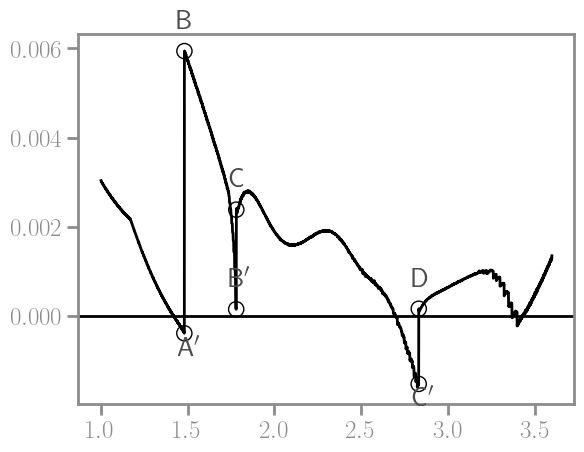

In [431]:
list_auto = np.array([1, 2, 3, 4, 10, 8]) 

fig, axis = plt.subplots(1, 1)

file_path = os.path.join(_datadir, f'load_vs_eigenvalue0_model_2.txt')
data_eig = load_data(file_path)
axis.plot(data_eig[:, 0], data_eig[:, 1], c='k')
axis.axhline(0, c='k', linestyle='-')
index_list = [924, 925, 1499, 1500, 3522, 3523]
list_letter = ['A\'', 'B', 'B\'', 'C', 'C\'', 'D']
delta_x = [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04]
delta_y = [-0.0002, 0.0001, -0.0002, 0.0001, 0.0001, -0.0002]
delta_x = -0.04
delta_y = -0.0005
for ind_j in range(len(index_list)):
    ind = index_list[ind_j]
    axis.scatter(data_eig[ind, 0], data_eig[ind, 1], s=120, facecolors='none', edgecolors='k', zorder=3)
    axis.text(data_eig[ind, 0]+delta_x, data_eig[ind, 1]-np.sign(data_eig[ind, 1])*delta_y, f'$\mathsf {list_letter[ind_j]}$', fontsize=20)
plt.savefig(os.path.join(_output, 'model_compliant_spectrum.png'), dpi=300)


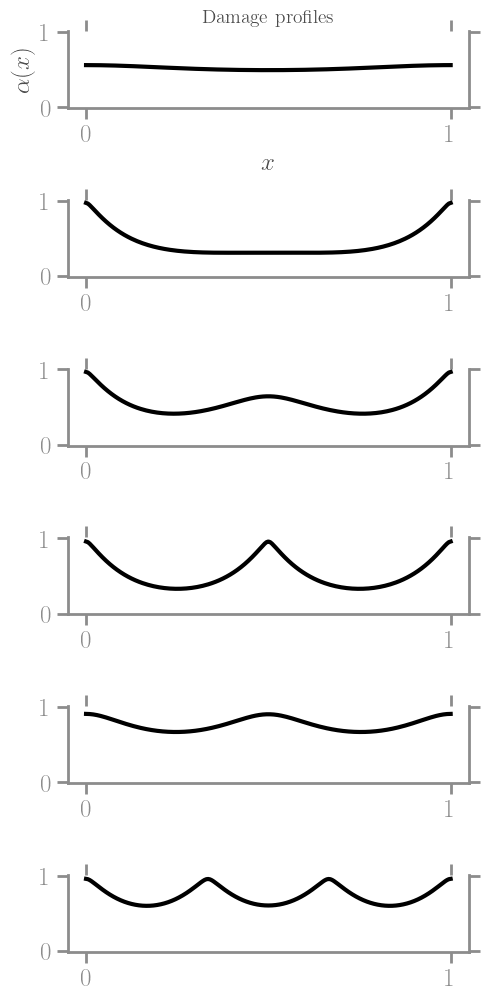

In [432]:
data_jumps = load_data(os.path.join(_datadir, 'jumps_alpha_model_2.txt'))
_cols = len(data_jumps[0, :])

fig, axis = plt.subplots(_cols-1, 1, figsize=(5, 10))

for ind_col in range(1,_cols):
    axis[ind_col-1].plot(data_jumps[:, 0], data_jumps[:, ind_col], c='k', lw=3)
    axis[ind_col-1].set_ylim([-0.01, 1.01])
    axis[ind_col-1].set_yticks([0, 1])
    axis[ind_col-1].set_xticks([0, 1])
    if ind_col == 1:
        axis[0].set_xlabel('$x$')
        axis[0].set_ylabel('$\\alpha(x)$')
# ax_A1.plot(data_jumps[:, 0], data_jumps[:, 1], c='C0')
# ax_A1.text(0.03, 0.01, 'A\'', fontsize=20)
# ##
# ax_A2.plot(data_jumps[:, 0], data_jumps[:, 2], c='C0')
# ax_A2.text(0.03, 0.01, 'B', fontsize=20)
# ##
# ax_A3.plot(data_jumps[:, 0], data_jumps[:, 3], c='C0')
# ax_A3.text(0.03, 0.01, 'B\'', fontsize=20)
# ##
# ax_A4.plot(data_jumps[:, 0], data_jumps[:, 4], c='C0')
# ax_A4.text(0.03, 0.01, 'C', fontsize=20)
# ##
# ax_A5.plot(data_jumps[:, 0], data_jumps[:, 5], c='C0')
# ax_A5.text(0.03, 0.01, 'C\'', fontsize=20)
# ##
# ax_A6.plot(data_jumps[:, 0], data_jumps[:, 6], c='C0')
# ax_A6.text(0.03, 0.01, 'F', fontsize=20)
visuals.setspines2()
plt.tight_layout()
axis[0].set_title('Damage profiles', fontsize=14)

plt.savefig(os.path.join(_output, 'model_compliant_profiles.png'), dpi=300)


0
1
2
3
4
5


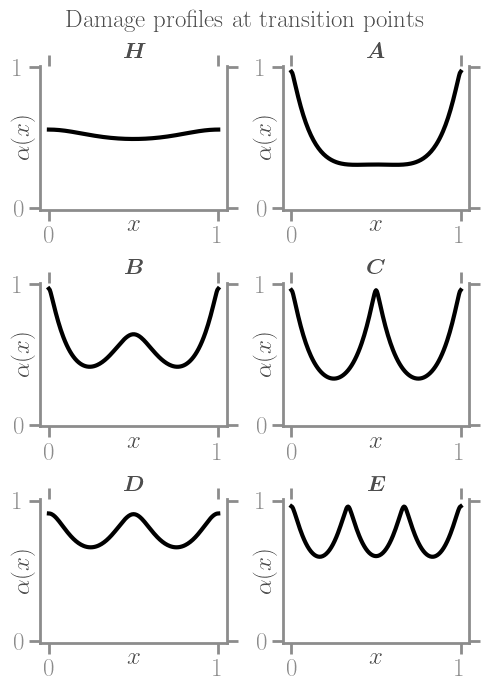

In [308]:
data_jumps = load_data(os.path.join(_datadir, 'jumps_alpha_model_2.txt'))
_cols = len(data_jumps[0, :])

# fig, axis = plt.subplots(1, _cols-1,  figsize=(12, 2))
fig, axes = plt.subplots(3, 2,  figsize=(5, 7))

for ind_col, label in zip(range(6), labels):
    row = ind_col // 2  # Determine the row index based on column index
    col = ind_col % 2   # Determine the column index based on column index
    ax = axes[row, col]  # Select the subplot corresponding to current row and column
    print(ind_col)
    # print(row, ind_col)
    # print((row+1) * (ind_col+1))
    ax.plot(data_jumps[:, 0], data_jumps[:, ind_col+1], c='k', lw=3)
    ax.set_ylim([-0.01, 1.01])
    ax.set_yticks([0, 1])
    ax.set_xticks([0, 1])
    ax.set_xlabel('$x$')
    ax.set_ylabel('$\\alpha(x)$')
    ax.yaxis.set_label_coords(-.03, .5)
    ax.xaxis.set_label_coords(.5, -.03)
    ax.set_title(label, fontsize=16)

visuals.setspines2()

plt.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Damage profiles at transition points', fontsize=18)
plt.savefig(os.path.join(_output, 'model_compliant_profiles.pdf'), dpi=300)



## Kicking the door

### Stiff substrate

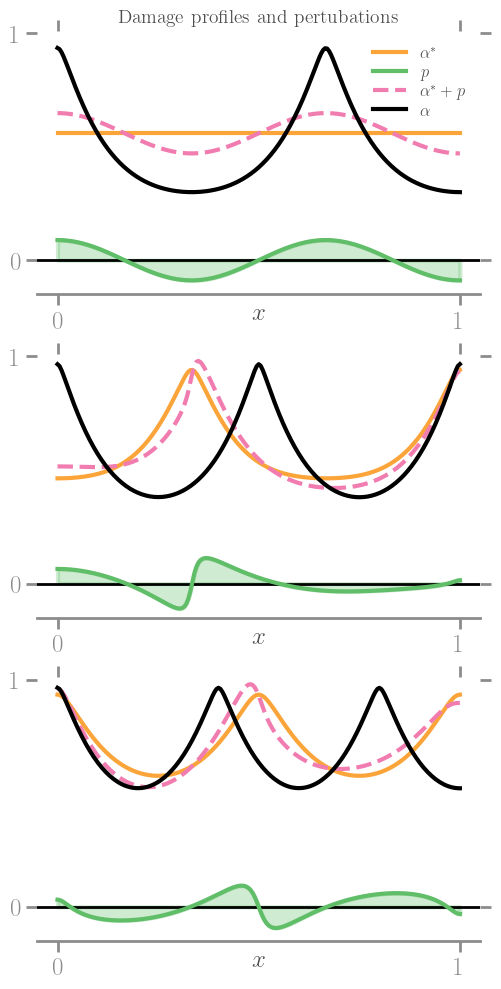

In [281]:

list_auto = np.array([1, 2, 3])

fig, axes = plt.subplots(len(list_auto), 1, figsize=(5, 10))


for index in range(len(list_auto)):
    data_kick = load_data(os.path.join(_datadir, f'kick_alpha_model_1_{list_auto[index]}.txt'))
    
    axes[index].axhline(0, c='k', linestyle='-')
    axes[index].plot(data_kick[:, 0], data_kick[:, 1], linewidth=3, c='C1', label=r'$\alpha^*$')
    axes[index].plot(data_kick[:, 0], data_kick[:, 2], linewidth=3, c='C2', label=r'$p$')
    axes[index].fill_between(data_kick[:, 0], data_kick[:, 2], linewidth=3, color='C2', alpha=.3)
    axes[index].plot(data_kick[:, 0], data_kick[:, 3], linewidth=3, c='C3', ls='--', label=r'$\alpha^*+p$')
    axes[index].plot(data_kick[:, 0], data_kick[:, 4], linewidth=3, c='k', label=r'$\alpha$')
    axes[index].set_ylim([-0.15, 1.01])
    axes[index].set_yticks([0, 1])
    axes[index].set_xticks([0, 1])
    axes[index].set_xlabel('$x$')
    axes[index].xaxis.set_label_coords(.5, -.03)
    
    
axes[0].set_title('Damage profiles and pertubations', fontsize=14)
axes[0].legend()
axes[0].set_xlabel('$x$')
plt.tight_layout()
visuals.setspines0()
# plt.savefig(os.path.join(_output, 'model_stiff_kick_profiles.png'), dpi=300)
plt.savefig(os.path.join(_output, 'model_stiff_kick_profiles.pdf'), dpi=300)


### Compliant substrate

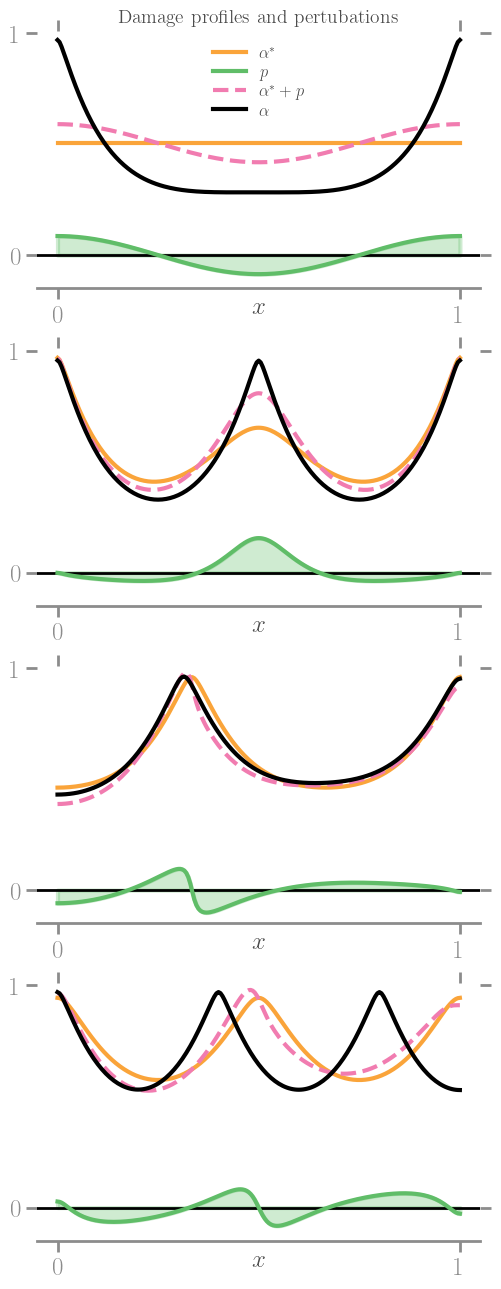

In [283]:

list_auto = np.array([1, 2, 3, 4]) 

fig, axes = plt.subplots(len(list_auto), 1, figsize=(5, 13))


for index in range(len(list_auto)):
    data_kick = load_data(os.path.join(_datadir, f'kick_alpha_model_2_{list_auto[index]}.txt'))
    
    axes[index].axhline(0, c='k', linestyle='-')
    axes[index].plot(data_kick[:, 0], data_kick[:, 1], linewidth=3, c='C1', label=r'$\alpha^*$')
    axes[index].plot(data_kick[:, 0], data_kick[:, 2], linewidth=3, c='C2', label=r'$p$')
    axes[index].fill_between(data_kick[:, 0], data_kick[:, 2], linewidth=3, color='C2', alpha=.3)
    axes[index].plot(data_kick[:, 0], data_kick[:, 3], linewidth=3, c='C3', ls='--', label=r'$\alpha^*+p$')
    axes[index].plot(data_kick[:, 0], data_kick[:, 4], linewidth=3, c='k', label=r'$\alpha$')
    axes[index].set_ylim([-0.15, 1.01])
    axes[index].set_yticks([0, 1])
    axes[index].set_xticks([0, 1])
    axes[index].set_xlabel('$x$')
    axes[index].xaxis.set_label_coords(.5, -.03)
    
    
    
axes[0].set_title('Damage profiles and pertubations', fontsize=14)
# axes[0].legend(mode = "expand", ncols = 4)
axes[0].legend(loc='upper center')
axes[0].set_xlabel('$x$')
plt.tight_layout()
visuals.setspines0()
# plt.savefig(os.path.join(_output, 'model_compliant_kick_profiles.png'), dpi=300)
plt.savefig(os.path.join(_output, 'model_compliant_kick_profiles.pdf'), dpi=300)


### Kick 

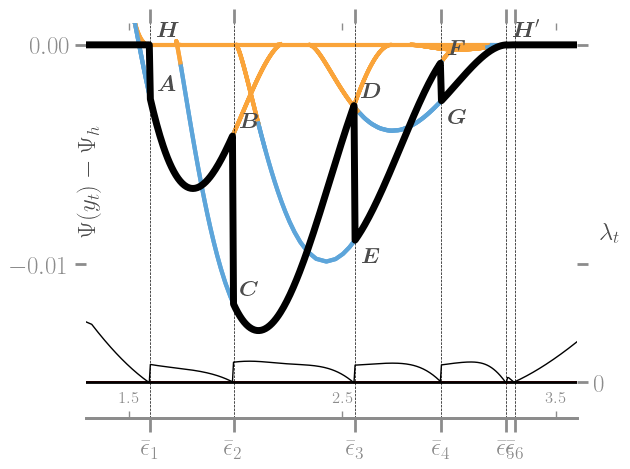

In [387]:
list_auto = np.array([1, 2, 3, 4, 8, 10]) 

fig, axes = plt.subplots(1, 1)

for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    
    data = load_data(os.path.join(_datadir, f'kick/model_1_{ind_p}.txt'))
    
    size_list = np.size(data[:, 0])
    
    stability_current  = data[0, 2]
    load_1 = np.array([data[0, 0]])
    energy_1 = np.array([data[0, 1]])

    for ind_e in range(size_list):
        load_t = data[ind_e, 0]
        if -stability_current==data[ind_e, 2] or ind_e==(size_list - 1):
            load_mean = (data[ind_e - 1, 0] + data[ind_e, 0])/2
            e_mean = (data[ind_e - 1, 1] + data[ind_e, 1])/2
            if np.size(load_1)>1:
                load_1[-1] = load_mean
                energy_1[-1] = e_mean
            if stability_current==1:
                axes.plot(load_1, energy_1, c='C0', linewidth=3)
            elif stability_current==-1:
                axes.plot(load_1, energy_1, c='C1', linewidth=3)
            stability_current  = data[ind_e, 2]
            load_1 =  np.array(load_mean)
            energy_1 =  np.array(e_mean)
        else:
            load_1 = np.append(load_1, data[ind_e, 0])
            energy_1 = np.append(energy_1, data[ind_e, 1])


# data_load = np.loadtxt('list_672_load.txt')
file_path = os.path.join(_datadir, f'kick/energy.dat')
data_load = load_data(file_path)
num_points = np.size(data_load, 0)



# energy_list = np.zeros(num_points)
# rs = 0.5
# for ind_pl in range(num_points):
#     load = data_load[ind_pl, 0]
#     e0 = load*load/(2.0 + load*load) + (rs/2.0)*load*load
#     energy_list[ind_pl] = data_load[ind_pl, 1] - e0
axes.plot(data_load[:, 0], data_load[:, 4], c='k', linewidth=5)
extra_jumps = [655, 663]
jump_indices = find_energy_jumps(data_load[:, 4], threshold=0.0005)+ extra_jumps
[axes.axvline(data_load[idx, 0], color='k', linestyle='--', linewidth=0.5) for idx in jump_indices]

axes.set_xticks([point for point in data_load[jump_indices, 0]],
               [*[f'$\\bar \\epsilon_{i}$' for i in range(1, len(data_load[jump_indices, 0])+1)]])
axes.tick_params(axis='x', which='major', direction='out', length=10, width=2)

axes.set_xticks(np.arange(1.5, 4.5), np.arange(1.5,  4.5),  minor=True)
axes.tick_params(axis='x', which='minor', direction='in', length=5, width=1, pad=-20, labelsize=12)
axes.set_yticks([-.01, 0])
axes.set_xlim(1.3, 3.6)
axes.set_ylim([-.017, 0.001])


axes.set_ylabel('$\Psi(y_t) - \Psi_h$')
axes.yaxis.set_label_coords(.03, .6)


index_list = list(sorted(set(jump_indices + [j-1 for j in jump_indices]))) + extra_jumps

labels = ['$\\boldsymbol{H}$', '$\\boldsymbol{A}$', '$\\boldsymbol{B}$', 
          '$\\boldsymbol{C}$', '$\\boldsymbol{D}$', '$\\boldsymbol{E}$', 
          '$\\boldsymbol{F}$', '$\\boldsymbol{G}$', 
          '$\\boldsymbol{H}\'$']
for index, label in zip(index_list, labels):
    annotate_point = (data_load[index, 0], data_load[index, 4])
    if label == '$\\boldsymbol{E}$':
        axes.text(annotate_point[0]+.03, annotate_point[1]-0.001, label, fontsize=16)
    elif label == '$\\boldsymbol{G}$':
        axes.text(annotate_point[0]+.03, annotate_point[1]-0.001, label, fontsize=16)
    else:
        axes.text(annotate_point[0]+.03, annotate_point[1]+0.0004, label, fontsize=16)

as_spectrum = axes.twinx()
as_spectrum.plot(data_load[:, 0], np.maximum(data_load[:, 3], 0), c='k', lw=1)
as_spectrum.fill_between(data_load[:, 0], np.minimum(data_load[:, 3], 0), color='r')
as_spectrum.axhline(0, c='k', linestyle='-')
as_spectrum.set_yticks([0])
as_spectrum.set_ylim([-0.001, .01])
# as_spectrum.set_title('Eigenvalue spectrum')
as_spectrum.set_ylabel('$\lambda_t$', rotation="horizontal")
visuals.setspines0()
plt.tight_layout()
# plt.savefig(os.path.join(_output, 'model_compliant_energy_kick.png'), dpi=300)
plt.savefig(os.path.join(_output, 'model_stiff_energy_kick_algo.pdf'), dpi=300)


In [364]:
sorted(index_list)

[320, 321, 398, 399, 512, 513, 593, 594]

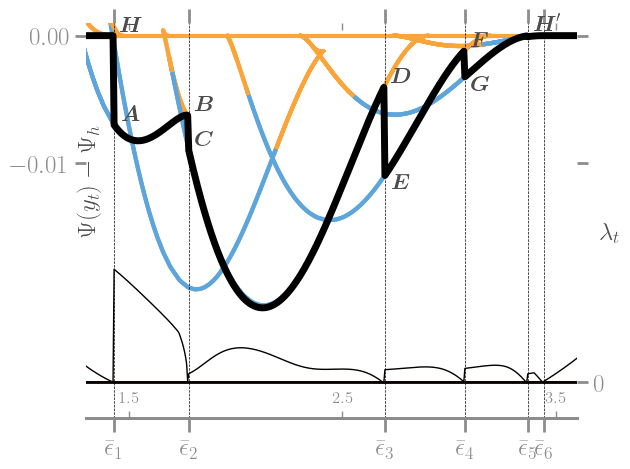

In [21]:
list_auto = np.array([1, 2, 3, 4, 6, 7, 9]) 

fig, axes = plt.subplots(1, 1)

for ind_pt in range(len(list_auto)):
    ind_p = list_auto[ind_pt]
    
    data = load_data(os.path.join(_datadir, f'kick/model_2_{ind_p}.txt'))
    
    size_list = np.size(data[:, 0])
    
    stability_current  = data[0, 2]
    load_1 = np.array([data[0, 0]])
    energy_1 = np.array([data[0, 1]])

    for ind_e in range(size_list):
        load_t = data[ind_e, 0]
        if -stability_current==data[ind_e, 2] or ind_e==(size_list - 1):
            load_mean = (data[ind_e - 1, 0] + data[ind_e, 0])/2
            e_mean = (data[ind_e - 1, 1] + data[ind_e, 1])/2
            if np.size(load_1)>1:
                load_1[-1] = load_mean
                energy_1[-1] = e_mean
            if stability_current==1:
                axes.plot(load_1, energy_1, c='C0', linewidth=3)
            elif stability_current==-1:
                axes.plot(load_1, energy_1, c='C1', linewidth=3)
            stability_current  = data[ind_e, 2]
            load_1 =  np.array(load_mean)
            energy_1 =  np.array(e_mean)
        else:
            load_1 = np.append(load_1, data[ind_e, 0])
            energy_1 = np.append(energy_1, data[ind_e, 1])


# data_load = np.loadtxt('list_672_load.txt')
file_path = os.path.join(_datadir, f'kick/energy_2.dat')
data_load = load_data(file_path)
num_points = np.size(data_load, 0)



# energy_list = np.zeros(num_points)
# rs = 0.5
# for ind_pl in range(num_points):
#     load = data_load[ind_pl, 0]
#     e0 = load*load/(2.0 + load*load) + (rs/2.0)*load*load
#     energy_list[ind_pl] = data_load[ind_pl, 1] - e0
axes.plot(data_load[:, 0], data_load[:, 4], c='k', linewidth=5, alpha=1.)
extra_jumps = [675, 690]
jump_indices = find_energy_jumps(data_load[:, 4], threshold=0.0005)+ extra_jumps
[axes.axvline(data_load[idx, 0], color='k', linestyle='--', linewidth=0.5) for idx in jump_indices]

axes.set_xticks([point for point in data_load[jump_indices, 0]],
               [*[f'$\\bar \\epsilon_{i}$' for i in range(1, len(data_load[jump_indices, 0])+1)]])
axes.tick_params(axis='x', which='major', direction='out', length=10, width=2)

axes.set_xticks(np.arange(1.5, 4.5), np.arange(1.5,  4.5),  minor=True)
axes.tick_params(axis='x', which='minor', direction='in', length=5, width=1, pad=-20, labelsize=12)
axes.set_yticks([-.01, 0])
axes.set_xlim(1.3, 3.6)
axes.set_ylim([-.03, 0.001])


axes.set_ylabel('$\Psi(y_t) - \Psi_h$')
axes.yaxis.set_label_coords(.03, .6)


index_list = list(sorted(set(jump_indices + [j-1 for j in jump_indices]))) + extra_jumps

labels = ['$\\boldsymbol{H}$', '$\\boldsymbol{A}$', '$\\boldsymbol{B}$', 
          '$\\boldsymbol{C}$', '$\\boldsymbol{D}$', '$\\boldsymbol{E}$', 
          '$\\boldsymbol{F}$', '$\\boldsymbol{G}$', 
          '$\\boldsymbol{H}\'$']
for index, label in zip(index_list, labels):
    annotate_point = (data_load[index, 0], data_load[index, 4])
    if label == '$\\boldsymbol{E}$':
        axes.text(annotate_point[0]+.03, annotate_point[1]-0.001, label, fontsize=16)
    elif label == '$\\boldsymbol{G}$':
        axes.text(annotate_point[0]+.03, annotate_point[1]-0.001, label, fontsize=16)
    elif label == '$\\boldsymbol{H}\'$':
        axes.text(annotate_point[0]+.03, annotate_point[1]+0.0005, label, fontsize=16)
    else:
        axes.text(annotate_point[0]+.03, annotate_point[1]+0.0004, label, fontsize=16)

as_spectrum = axes.twinx()
as_spectrum.plot(data_load[:, 0], np.maximum(data_load[:, 3], 0), c='k', lw=1)
as_spectrum.fill_between(data_load[:, 0], np.minimum(data_load[:, 3], 0), color='r')
as_spectrum.axhline(0, c='k', linestyle='-')
as_spectrum.set_yticks([0])
as_spectrum.set_ylim([-0.001, .01])
# as_spectrum.set_title('Eigenvalue spectrum')
as_spectrum.set_ylabel('$\lambda_t$', rotation="horizontal")
visuals.setspines0()
plt.tight_layout()
# plt.savefig(os.path.join(_output, 'model_compliant_energy_kick.png'), dpi=300)
plt.savefig(os.path.join(_output, 'model_compliant_energy_kick_algo.pdf'), dpi=300)
